# Credit Risk Assessment

To assess Loan Application and decide to Approve or Reject

## Initialization

To initialize development environment

In [1]:
# to request Jupyter to print all data in one code section.
%config InteractiveShell.ast_node_interactivity='all'

# Importing the initial required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, silhouette_score, calinski_harabasz_score

# to save and load trained model file
from joblib import dump, load

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

## Data Study

To understand data pattern

In [2]:
fp = "/Users/Shared/Doc/apps/AI/NTUC/VLC-SCAI012-24-0652/Loan/"
dataurl = fp + "Loan2.csv"
df_orig = pd.read_csv(dataurl)
df_orig.head(2)

print("\n", "--" * 50, "\n")
print("Summary of the data\n")
print("Dimension of the data:", df_orig.shape)
df_orig.info()

print("\n", "--" * 50, "\n")
print("Missing values in the entire dataframe")
print(df_orig.isnull().sum().sum())

print("\n", "--" * 50, "\n")
print("Statistical description:")
df_orig.describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,45.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0



 ---------------------------------------------------------------------------------------------------- 

Summary of the data

Dimension of the data: (20000, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-nul

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,51.695900
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,9.053856
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,26.400000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,53.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,58.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,82.000000


In [3]:
# to categorize all the fields

# Object Feature Fields
FeatureFieldO = ["EmploymentStatus", "EducationLevel", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", ]
df_orig[FeatureFieldO].head(2)

# Binary/Bool Feature Fields
FeatureFieldB = ["PreviousLoanDefaults", "BankruptcyHistory", ]
df_orig[FeatureFieldB].head(2)

# Number Feature Fields
FeatureFieldN = ["Age", "Experience", "JobTenure", "NumberOfDependents", "NumberOfOpenCreditLines", "NumberOfCreditInquiries", ]
df_orig[FeatureFieldN].head(2)

# All Feature Fields
FeatureFields = FeatureFieldO + FeatureFieldB + FeatureFieldN

# Amount Feature Fields
NumberFields = ["AnnualIncome", "MonthlyDebtPayments", "CreditCardUtilizationRate", "SavingsAccountBalance", "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", "LengthOfCreditHistory", ]
df_orig[NumberFields].head(2)

# Calculated Amount Fields
CalcFields = ["MonthlyIncome", "NetWorth", "TotalDebtToIncomeRatio", ]
df_orig[CalcFields].head(2)
# Source Fields used to Calculate above Amount Fields, it can be dropped if use Calculated Field to train
CalcFieldsS = ["AnnualIncome", "TotalAssets", "TotalLiabilities", "MonthlyDebtPayments", "MonthlyLoanPayment", ]

# Application Fields
ApplicationFields = ["LoanAmount", "LoanDuration", "BaseInterestRate", "InterestRate", "MonthlyLoanPayment", ]
df_orig[ApplicationFields].head(2)

# Output Fields
OutputFields = ["LoanApproved", "CreditScore", "RiskScore", ]
df_orig[OutputFields].head(2)

# Unknown Fields, not sure the definition, unit or usage. don't consider them in model training at the moment
# PaymentHistory in manual algorithm, logic is inconsistent, value doesn't cause different cross all data. so no impact any all, can be ignored
# DebtToIncomeRatio in manual algorithm, logic is inconsistent, it should be same as TotalDebtToIncomeRatio, modified generation code to replace it with TotalDebtToIncomeRatio
# UtilityBillsPaymentHistory is not used in manual algorithm, can be ignored
UnknownFields = ["PaymentHistory", "DebtToIncomeRatio", "UtilityBillsPaymentHistory", ]
df_orig[UnknownFields].head(2)

# to verify total number of fields
print(len(df_orig.columns))
print(1 + len(FeatureFields) + len(NumberFields) + len(OutputFields) + len(CalcFields) + len(UnknownFields))


,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,Employed,Master,Married,Own,Home
1,Employed,Associate,Single,Mortgage,Debt Consolidation


,PreviousLoanDefaults,BankruptcyHistory
0,0,0
1,0,0


,Age,Experience,JobTenure,NumberOfDependents,NumberOfOpenCreditLines,NumberOfCreditInquiries
0,45,22,11,2,1,2
1,38,15,3,1,5,3


,AnnualIncome,MonthlyDebtPayments,CreditCardUtilizationRate,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,LengthOfCreditHistory
0,39948,183,0.354418,7632,1202,146111,19183,9
1,39709,496,0.087827,4627,3460,53204,9595,9


,MonthlyIncome,NetWorth,TotalDebtToIncomeRatio
0,3329.000000,126928,0.181077
1,3309.083333,43609,0.389852


,LoanAmount,LoanDuration,BaseInterestRate,InterestRate,MonthlyLoanPayment
0,13152,48,0.199652,0.227590,419.805992
1,26045,48,0.207045,0.201077,794.054238


,LoanApproved,CreditScore,RiskScore
0,0,617,45.0
1,0,628,52.0


,PaymentHistory,DebtToIncomeRatio,UtilityBillsPaymentHistory
0,29,0.358336,0.724972
1,21,0.330274,0.935132


36
31


In [4]:
# to get distinct value for Feature Fields
for f in FeatureFieldO:
    df_orig[f].value_counts()
    
for f in FeatureFieldN:
    df_orig[f].value_counts()


EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64

MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

Age
18    803
40    715
39    682
42    676
37    669
     ... 
80      8
74      8
76      4
78      3
79      3
Name: count, Length: 63, dtype: int64

Experience
0     1706
18     722
15     666
16     654
13     641
      ... 
56       5
58       4
61       1
59       1
60       1
Name: count, Length: 62, dtype: int64

JobTenure
4     3609
5     3528
6     2835
3     2759
7     2098
2     1675
8     1279
9      770
1      652
10     392
0      152
11     146
12      66
13      28
14       8
15       2
16       1
Name: count, dtype: int64

NumberOfDependents
0    6074
1    5027
2    3916
3    3033
4    1362
5     588
Name: count, dtype: int64

NumberOfOpenCreditLines
3     4571
2     4483
4     3354
1     2945
5     1930
6     1079
0      932
7      457
8      168
9       59
10      16
11       4
13       1
12       1
Name: count, dtype: int64

NumberOfCreditInquiries
1    7506
0    7299
2    3666
3    1185
4     272
5      56
6      13
7       3
Name: count, dtype: int64

## Pre-process

To pre-process data before model training

### Standardize data

To make the data consistent

In [5]:
# basic pre-processing to standardize data 

# to clone from original data
df = df_orig.copy(deep=True)

# to drop the fields that won't be used for analysis
# don't consider Loan Application Date, analysis a snapshot, not a time series data.
df = df.drop("ApplicationDate", axis=1)

# to convert all numbers field into float64 for training later using consistent data type
non_object_fields = df_orig.select_dtypes(exclude=['object']).columns
df[non_object_fields] = df_orig[non_object_fields].astype('float64')

# to convert binary fields into Bool Type to be consistent with the object features fields
df[FeatureFieldB] = df_orig[FeatureFieldB].astype('bool')
df["LoanApproved"] = df_orig["LoanApproved"].astype('bool')


# encoding process

# Object Feature Fields in One-Hot encoding
FeatureFieldOH = pd.get_dummies(df[FeatureFieldO], columns=FeatureFieldO).columns.to_list()
df_onehot = pd.get_dummies(df[FeatureFieldO], columns=FeatureFieldO, drop_first=False)
df = pd.concat([df, df_onehot], axis=1)
FeatureFieldOH

# Object Feature Fields in Factorize encoding
FeatureFieldOF=[]
for f in FeatureFieldO:
    fn = f + "_Fac"
    FeatureFieldOF.append(fn)
    df[fn] = df[f].factorize()[0]
df[FeatureFieldOF] = df[FeatureFieldOF].astype('float64')
FeatureFieldOF

# to categorize the Number feature fields into number of bins
FeatureFieldNH = []
for f in FeatureFieldN:
    b = pd.DataFrame()
    b[f + "_Bins"] = pd.cut(df[f], bins=5, precision=0)
    # to convert bin field into One-Hot fields
    b = pd.get_dummies(b, columns=[f + "_Bins"])
    df = pd.concat([df, b], axis=1)
    FeatureFieldNH.extend(b.columns.to_list())
    # df.drop(f) # to drop original bin field after it is converted into one-hot fields

df.head(2)
df.info()


['EmploymentStatus_Employed',
 'EmploymentStatus_Self-Employed',
 'EmploymentStatus_Unemployed',
 'EducationLevel_Associate',
 'EducationLevel_Bachelor',
 'EducationLevel_Doctorate',
 'EducationLevel_High School',
 'EducationLevel_Master',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Widowed',
 'HomeOwnershipStatus_Mortgage',
 'HomeOwnershipStatus_Other',
 'HomeOwnershipStatus_Own',
 'HomeOwnershipStatus_Rent',
 'LoanPurpose_Auto',
 'LoanPurpose_Debt Consolidation',
 'LoanPurpose_Education',
 'LoanPurpose_Home',
 'LoanPurpose_Other']

['EmploymentStatus_Fac',
 'EducationLevel_Fac',
 'MaritalStatus_Fac',
 'HomeOwnershipStatus_Fac',
 'LoanPurpose_Fac']

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,"NumberOfOpenCreditLines_Bins_(-0.0, 3.0]","NumberOfOpenCreditLines_Bins_(3.0, 5.0]","NumberOfOpenCreditLines_Bins_(5.0, 8.0]","NumberOfOpenCreditLines_Bins_(8.0, 10.0]","NumberOfOpenCreditLines_Bins_(10.0, 13.0]","NumberOfCreditInquiries_Bins_(-0.01, 1.0]","NumberOfCreditInquiries_Bins_(1.0, 3.0]","NumberOfCreditInquiries_Bins_(3.0, 4.0]","NumberOfCreditInquiries_Bins_(4.0, 6.0]","NumberOfCreditInquiries_Bins_(6.0, 7.0]"
0,45.0,39948.0,617.0,Employed,Master,22.0,13152.0,48.0,Married,2.0,...,True,False,False,False,False,False,True,False,False,False
1,38.0,39709.0,628.0,Employed,Associate,15.0,26045.0,48.0,Single,1.0,...,False,True,False,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 91 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        20000 non-null  float64
 1   AnnualIncome                               20000 non-null  float64
 2   CreditScore                                20000 non-null  float64
 3   EmploymentStatus                           20000 non-null  object 
 4   EducationLevel                             20000 non-null  object 
 5   Experience                                 20000 non-null  float64
 6   LoanAmount                                 20000 non-null  float64
 7   LoanDuration                               20000 non-null  float64
 8   MaritalStatus                              20000 non-null  object 
 9   NumberOfDependents                         20000 non-null  float64
 10  HomeOwnershipStatus   

### Features Engineering

To find out which features to be used for training

In [6]:
# to pick the fields for training
sf = sorted(list(set( \
    FeatureFieldB \
    + FeatureFieldOH \
    + FeatureFieldN \
    + NumberFields \
    + ApplicationFields \
    + CalcFields \
    + ["NetWorth", "MonthlyIncome", "MonthlyDebtPayments", "MonthlyLoanPayment", ] \
    + OutputFields
    )))
df_train = df[sf]

# to clone Y from training data, Y is used for result evaluation later
Y = df_train.copy(deep=True).head(20000)

# to prepare X for training
X = Y.copy(deep=True)
# to remove the manual label Output Fields, Outlier, that may affect the training
drop_fields = OutputFields
# to remove Account Balance that may not affect the training.
drop_fields = drop_fields + ["SavingsAccountBalance", "CheckingAccountBalance", ]
# to remove base fields that are used to calculate other field. it may be redundant for training.
# drop_fields = drop_fields + ["MonthlyDebtPayments", "MonthlyLoanPayment", "MonthlyIncome", ] # base fields used to calculate TotalDebtToIncomeRatio
# calculated field 
# drop_fields = drop_fields + ["TotalDebtToIncomeRatio", ] # calculated field
X = X.drop(drop_fields, axis=1)
X.info()

# correlation_matrix = X.corr()
# plt.figure(figsize=(40, 40))
# sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   AnnualIncome                    20000 non-null  float64
 2   BankruptcyHistory               20000 non-null  bool   
 3   BaseInterestRate                20000 non-null  float64
 4   CreditCardUtilizationRate       20000 non-null  float64
 5   EducationLevel_Associate        20000 non-null  bool   
 6   EducationLevel_Bachelor         20000 non-null  bool   
 7   EducationLevel_Doctorate        20000 non-null  bool   
 8   EducationLevel_High School      20000 non-null  bool   
 9   EducationLevel_Master           20000 non-null  bool   
 10  EmploymentStatus_Employed       20000 non-null  bool   
 11  EmploymentStatus_Self-Employed  20000 non-null  bool   
 12  EmploymentStatus_Unemployed     

### Feature Relation Analysis

To use Pair Plot to find out the relation between fields and approve/reject.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Scatterplot of Cluster Categories')

<Figure size 1000x600 with 0 Axes>

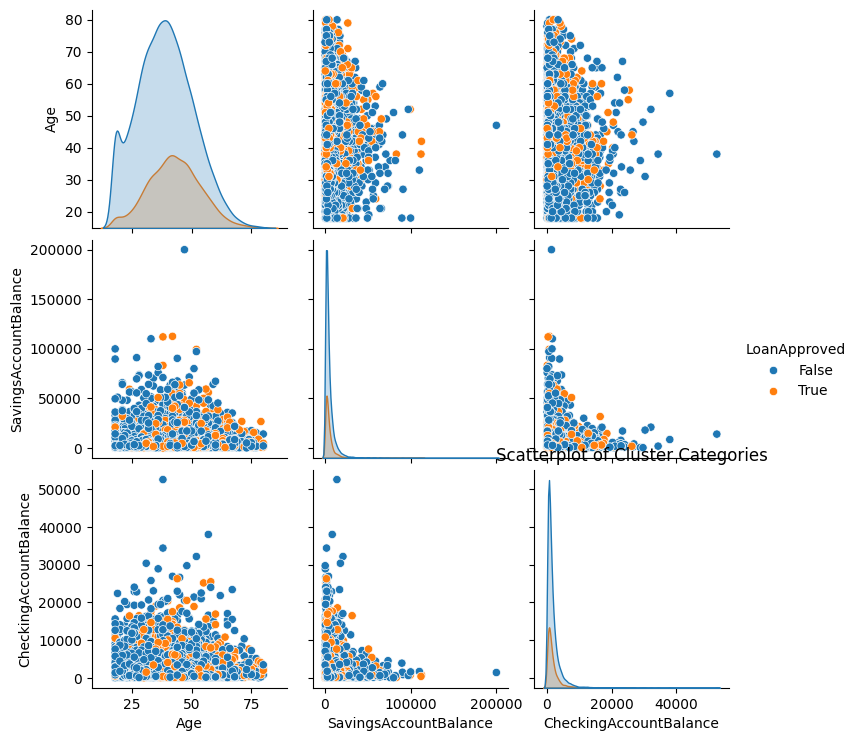

In [7]:
# to pick some fields for analysis. 
plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Age", y="AnnualIncome", data=X, hue=labels, palette='viridis')
l = pd.DataFrame(df_train, columns=['LoanApproved'])
c = pd.concat([df_train[["Age", "SavingsAccountBalance", "CheckingAccountBalance", ]], l], axis=1)
sns.pairplot(c, hue="LoanApproved", )
plt.title('Scatterplot of Cluster Categories')
plt.show()

Additional analysis for the relation feature fields

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Scatterplot of Cluster Categories')

<Figure size 1000x600 with 0 Axes>

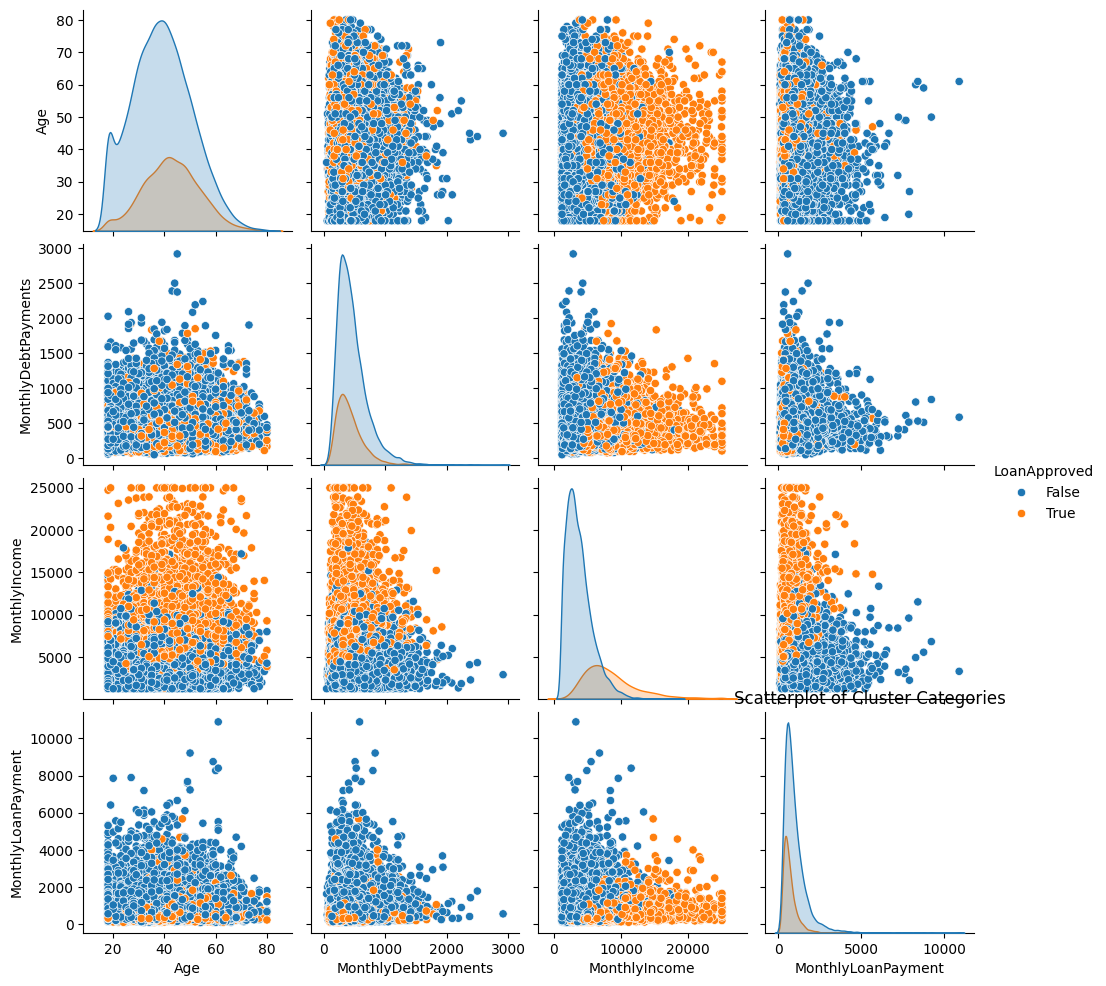

In [7]:
# to pick some fields for analysis. 
plt.figure(figsize=(10, 6))
# sns.scatterplot(x="Age", y="AnnualIncome", data=X, hue=labels, palette='viridis')
l = pd.DataFrame(df_train, columns=['LoanApproved'])
c = pd.concat([df_train[["Age", "MonthlyDebtPayments", "MonthlyIncome", "MonthlyLoanPayment", ]], l], axis=1)
sns.pairplot(c, hue="LoanApproved", )
plt.title('Scatterplot of Cluster Categories')
plt.show()

### Outlier

To identify Outliers

In [8]:
# to find out the outlier record

# hyper-parameter
hp_c = 0.01 # for IsolationForest contamination

# to create an Isolation Forest model
ifm = IsolationForest(random_state=48, contamination=0.01)

# to fit the model to the data
a = ifm.fit(X)

# to predict Outliers (1 for inliers, -1 for outliers)
ifm_predict = pd.DataFrame(ifm.predict(X), index=X.index)

# to mark the Outliers Data using Boolean
# as Outlier may not used for training. so keep it in Y first.
Y["Outlier"] = ifm_predict == -1
Y[Y["Outlier"] == True]["LoanApproved"].value_counts()

# to include/exclude Outlier for training
# X["Outlier"] = Y["Outlier"]


LoanApproved
False    146
True      54
Name: count, dtype: int64

## Model Training

In [21]:
# to use unsupervised Gaussian Mixture method to train the model and predict the clusters

# to reserve the column for validation later
Y["LoanApprovedAI"] = False

# to calc the Seed Record that is approved for sure. It is used to identify which cluster is marked as approved during un-supervised training, semi-un-supervised
LoanApprovedSeed = Y \
    .nlargest(64, "NetWorth") \
    .nlargest(16, "MonthlyIncome") \
    .nsmallest(4, "MonthlyDebtPayments") \
    .nsmallest(1, "MonthlyLoanPayment") 

# to define hyper-parameter
hp_c = 2 # number of cluster for labeling
hp_r = 42 # random_state

# to standardize the data
scaler = StandardScaler()
a = scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index) # to align the index

best_model = None
best_labels = None
best_score = -1
eval_result = pd.DataFrame()
for c in range(hp_c, hp_c + 5): # 5
    for r in range(hp_r, hp_r + 3): # 3
        # To use GaussianMixture Model
        # model = GaussianMixture(n_components=c, init_params="random", random_state=r)
        # To use KMeans
        model = KMeans(n_clusters=c, init='k-means++', random_state=r)

        # to train the model
        a = model.fit(X_scaled)
        # to predict labels
        labels = model.predict(X_scaled)

        # to keep the original labels
        b = pd.DataFrame({"LoanApprovedAIl": labels}, index=X_scaled.index)
        # to derive the standard labels using Seed Record
        b["LoanApprovedAI"] = b["LoanApprovedAIl"] == b.loc[LoanApprovedSeed.index[0]][0]

        # to evaluate the picking of cluster
        t = b["LoanApprovedAI"].value_counts()[True]
        f = b["LoanApprovedAI"].value_counts()[False]
        # score = -abs(t - f)/(t + f) # Negative Balance Ratio, assume the gap between False and True, smaller is better, ie. Approve and Reject is similar
        # score = min(t, f) / max(t, f) # Class Balance Measure, assume Approve and Reject is similar
        # score = calinski_harabasz_score(X, labels) # Calinski-Harabasz. higher is better
        # score = silhouette_score(X, labels) # Silhouette Coefficient measures how similar a data point is to its own cluster compared to other clusters.
        # score = abs(t - f)/(t + f) # Balance Ratio, assume the gap between False and True, bigger is better, ie. lesser Approve is better
        score = 1 - (t/(t + f))**2 - (f/(t + f))**2 # Gini Coefficient, assume Approve and Reject is similar
        if score > best_score: # score is better
            best_model = model
            best_labels = b
            best_score = score
            print(f"Best Score={score}, cluster={c}, random_state={r}, True={t}, False={f}, SeedIndex={LoanApprovedSeed.index[0]}, SeedLabel={b.iat[LoanApprovedSeed.index[0], 0]}")
        else: # score is not better
            print(f"Score={score}, cluster={c}, random_state={r}, True={t}, False={f}, SeedIndex={LoanApprovedSeed.index[0]}, SeedLabel={b.iat[LoanApprovedSeed.index[0], 0]}")

        # to evaluate the result using manual label.
        C = pd.DataFrame()
        C["LoanApproved"] = Y["LoanApproved"]
        C["LoanApprovedAI"] = b["LoanApprovedAI"]
        C["LoanApprovedCompare"] = C["LoanApproved"] == C["LoanApprovedAI"]
        la_tf = C.groupby(["LoanApprovedAI", "LoanApproved"]).size()

        # Custom weights
        W_TT = 1.0   # TT (True Positives), Actual Value is same as Predicted Value, both are True
        W_FF = 0.7   # FF (True Negatives), Actual Value is same as Predicted Value, both are False
        W_TF = 0.5   # TF (False Negatives), Actual Value is False, Predicted Value is True
        W_FT = 0.3   # FT (False Positives), Actual Value is True, Predicted Value is False

        TP = la_tf.loc[(True,True)]  # True Positive (TT)
        TN = la_tf.loc[(False,False)]  # True Negative (FF)
        FN = la_tf.loc[(True,False)]  # False Negative (TF)
        FP = la_tf.loc[(False,True)]  # False Positive (FT)
        total = TP + TN + FN + FP

        accuracy = (TP + TN)/total
        weighted = ((W_TT * TP) + (W_FF * TN) + (W_TF * FN) + (W_FT * FP)) / total

        # to keep the evaluation result
        e = pd.Series({"Clusters": c, "Random": r, "Score": score, "AT": t, "AF": f, "Accuracy": accuracy, "Weighted": weighted, "TT": TP, "FF": TN, "TF": FN, "FT": FP})
        eval_result = pd.concat([eval_result, e.to_frame().T], ignore_index=True)
        eval_result.head(1)

        # b.value_counts()
        
# to keep the label
Y["LoanApprovedAIl"] = best_labels["LoanApprovedAIl"]
# to mark LoanApprovedAI of current loop as True if the label is same as the label of the seed record
Y["LoanApprovedAI"] = best_labels["LoanApprovedAI"]
Y["LoanApprovedCompare"] = Y["LoanApproved"] == Y["LoanApprovedAI"]

df_group = Y.groupby(["LoanApprovedCompare", "LoanApprovedAI", "LoanApproved"]).agg({'MonthlyLoanPayment': ['sum', 'count']})
formatted_sum = df_group.applymap(lambda x: f"{x:,.2f}")
print(formatted_sum)


Best Score=0.49934477999999993, cluster=2, random_state=42, True=10362, False=9638, SeedIndex=9567, SeedLabel=0


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Best Score=0.49980398000000004, cluster=2, random_state=43, True=10198, False=9802, SeedIndex=9567, SeedLabel=1


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.49952259500000007, cluster=2, random_state=44, True=10309, False=9691, SeedIndex=9567, SeedLabel=0


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.495553755, cluster=3, random_state=42, True=9057, False=10943, SeedIndex=9567, SeedLabel=2


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.47989987500000003, cluster=3, random_state=43, True=7995, False=12005, SeedIndex=9567, SeedLabel=2


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.49248462, cluster=3, random_state=44, True=8774, False=11226, SeedIndex=9567, SeedLabel=0


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.43691648000000005, cluster=4, random_state=42, True=6448, False=13552, SeedIndex=9567, SeedLabel=3


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.4167271950000001, cluster=4, random_state=43, True=5919, False=14081, SeedIndex=9567, SeedLabel=2


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.472551755, cluster=4, random_state=44, True=7657, False=12343, SeedIndex=9567, SeedLabel=0


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.4564875000000001, cluster=5, random_state=42, True=7050, False=12950, SeedIndex=9567, SeedLabel=3


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.44854368, cluster=5, random_state=43, True=6792, False=13208, SeedIndex=9567, SeedLabel=3


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.2256076800000001, cluster=5, random_state=44, True=2592, False=17408, SeedIndex=9567, SeedLabel=4


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.44274272000000003, cluster=6, random_state=42, True=6616, False=13384, SeedIndex=9567, SeedLabel=3


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.22285987500000015, cluster=6, random_state=43, True=2555, False=17445, SeedIndex=9567, SeedLabel=5


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


Score=0.22419835500000007, cluster=6, random_state=44, True=2573, False=17427, SeedIndex=9567, SeedLabel=4


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.6859,0.70013,4430.0,9288.0,5932.0,350.0


                                                MonthlyLoanPayment          
                                                               sum     count
LoanApprovedCompare LoanApprovedAI LoanApproved                             
False               False          True                 280,820.68    388.00
                    True           False              4,790,237.04  5,806.00
True                False          False             10,144,663.65  9,414.00
                    True           True               3,016,419.67  4,392.00


## Model Validation

In [22]:
eval_result


,Clusters,Random,Score,AT,AF,Accuracy,Weighted,TT,FF,TF,FT
0,2.0,42.0,0.499345,10362.0,9638.0,0.68590,0.700130,4430.0,9288.0,5932.0,350.0
1,2.0,43.0,0.499804,10198.0,9802.0,0.69030,0.700060,4392.0,9414.0,5806.0,388.0
2,2.0,44.0,0.499523,10309.0,9691.0,0.68725,0.700075,4417.0,9328.0,5892.0,363.0
3,3.0,42.0,0.495554,9057.0,10943.0,0.68845,0.684965,3803.0,9966.0,5254.0,977.0
4,3.0,43.0,0.479900,7995.0,12005.0,0.74555,0.697385,3843.0,11068.0,4152.0,937.0
5,3.0,44.0,0.492485,8774.0,11226.0,0.70090,0.687030,3786.0,10232.0,4988.0,994.0
6,4.0,42.0,0.436916,6448.0,13552.0,0.77130,0.689635,3327.0,12099.0,3121.0,1453.0
7,4.0,43.0,0.416727,5919.0,14081.0,0.67065,0.637730,2056.0,11357.0,3863.0,2724.0
8,4.0,44.0,0.472552,7657.0,12343.0,0.58175,0.619450,2036.0,9599.0,5621.0,2744.0
9,5.0,42.0,0.456488,7050.0,12950.0,0.59320,0.617015,1847.0,10017.0,5203.0,2933.0


### Visualization of validation result

In [23]:
# to draw live diagram to show the most accuracy data
max_acc_idx = eval_result['Weighted'].idxmax()
max_score_idx = eval_result['Score'].idxmax()

# 3D scatter plot
fig = go.Figure(data=[
        go.Scatter3d(
            x=eval_result['Clusters'],
            y=eval_result['Random'],
            z=eval_result['Weighted'],
            mode='markers',
            marker=dict(size=eval_result['Score']*50, color='blue'),
            hoverinfo='text',
            hovertext=[f"Score: {acc:.2f}%" for acc in eval_result['Score']*100],
            name="Score",),
        go.Scatter3d(
            x=[eval_result.loc[max_acc_idx, 'Clusters']],
            y=[eval_result.loc[max_acc_idx, 'Random']],
            z=[eval_result.loc[max_acc_idx, 'Weighted']],
            mode='markers',
            marker=dict(
                size=[eval_result.loc[max_acc_idx, 'Score']*50], 
                color='orange', 
                symbol='circle',
                line=dict(width=1)
            ),
            hoverinfo='text',
            hovertext=[f"Max Weighted, Score: {eval_result.loc[max_acc_idx, 'Score']*100:.2f}%"],
            name="Max Weighted",),
        go.Scatter3d(
            x=[eval_result.loc[max_score_idx, 'Clusters']],
            y=[eval_result.loc[max_score_idx, 'Random']],
            z=[eval_result.loc[max_score_idx, 'Weighted']],
            mode='markers',
            marker=dict(
                size=[eval_result.loc[max_score_idx, 'Score']*50], 
                color='green', 
                symbol='circle',
                line=dict(width=1)
            ),
            hoverinfo='text',
            hovertext=[f"Max Score: {eval_result.loc[max_score_idx, 'Score']*100:.2f}%"],
            name="Max Score",),
    ])

# Set labels and title
fig.update_layout(
    title='Clusters, Random, Score and Weighted',
    scene=dict(
        xaxis_title='Clusters',
        xaxis=dict(tickformat="d", dtick=1),
        yaxis_title='Random',
        yaxis=dict(tickformat="d", dtick=1),
        zaxis_title='Weighted'
    )
)

# Show interactive plot
# fig.show()

### To keep the trained Credit Risk Model

To save the trained Credit Risk Model and scaler file for future use.

In [ ]:
# to save the model to files for future usage
dump(best_model, 'credit-risk-model.joblib')
dump(scaler, 'credit-risk-scaler.joblib')


## Credit Risk Loan Approve/Reject Prediction

to use Credit Risk Model for Loan Application Approve/Reject Assessment

In [ ]:
# to load the model from file
new_model = load('credit-risk-model.joblib')
new_scaler = load('credit-risk-scaler.joblib')

# to load loan application file
appurl = fp + "Loan2-application.csv"
da_orig = pd.read_csv(appurl)
da_orig.head(2)

# clone original
da = da_orig.copy(deep=True)
# drop unused column
da = da.drop("ApplicationDate", axis=1)
# consistent data type
da[non_object_fields] = da_orig[non_object_fields].astype('float64')
# Binary to Bool
da[FeatureFieldB] = da_orig[FeatureFieldB].astype('bool')
da["LoanApproved"] = da_orig["LoanApproved"].astype('bool')
# One-Hot Encoding
da_onehot = pd.get_dummies(da[FeatureFieldO], columns=FeatureFieldO, drop_first=False)
da = pd.concat([da, da_onehot], axis=1)

da_train = da[sf]
# to clone Y from training data, Y is used for result evaluation later
Ya = da_train.copy(deep=True).head(2000)

# to identify seed record
LoanApprovedSeeda = Ya.nlargest(64, "NetWorth").nlargest(16, "MonthlyIncome").nsmallest(4, "MonthlyDebtPayments").nsmallest(1, "MonthlyLoanPayment")
LoanApprovedSeeda

# to prepare X for training
Xa = Ya.copy(deep=True)
Xa = Xa.drop(drop_fields, axis=1)

Xa_scaled = pd.DataFrame(new_scaler.transform(Xa), columns=Xa.columns, index=Xa.index) # to align the index

# to predict the result
new_labels = new_model.predict(Xa_scaled)
ba = pd.DataFrame({"LoanApprovedAIl": new_labels}, index=Xa_scaled.index)
ba["LoanApprovedAI"] = ba["LoanApprovedAIl"] == ba.loc[LoanApprovedSeeda.index[0]][0]

# to calculate accuracy
Ya['LoanApproved'] = da_train["LoanApproved"]
Ya['LoanApprovedAI'] = new_labels.astype('bool')
Ya["LoanApprovedCompare"] = Ya["LoanApproved"] == Ya["LoanApprovedAI"]
da_group = Ya.groupby(["LoanApprovedAI", "LoanApproved"]).size()

# Custom weights
W_TT = 1.0   # TT (True Positives), Actual Value is same as Predicted Value, both are True
W_FF = 0.7   # FF (True Negatives), Actual Value is same as Predicted Value, both are False
W_TF = 0.5   # TF (False Negatives), Actual Value is False, Predicted Value is True
W_FT = 0.3   # FT (False Positives), Actual Value is True, Predicted Value is False

TP = la_tf.loc[(True,True)]  # True Positive (TT)
TN = la_tf.loc[(False,False)]  # True Negative (FF)
FN = la_tf.loc[(True,False)]  # False Negative (TF)
FP = la_tf.loc[(False,True)]  # False Positive (FT)
total = TP + TN + FN + FP

accuracy = (TP + TN)/total
weighted = ((W_TT * TP) + (W_FF * TN) + (W_TF * FN) + (W_FT * FP)) / total
print("Accuracy=", accuracy)
print("Weighted=", weighted)
da_group

# to save the Loan Application Approve/Reject result to a file
Ya.to_csv("Loan2-application-result.csv", index=False)